In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from random import randint
from scipy.stats import randint as sp_randint

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
os.chdir("/Users/dongminsun/Desktop")

In [3]:
play = pd.read_csv("model_plays.csv")

In [4]:
# with only "pass" & "run"
target_col = play.loc[play["target"].isin(["field_goal","punt","qb_kneel","qb_spike"])]

In [5]:
import seaborn as sns

tar = target_col.groupby(['target','yardline_100']).size().to_frame('occurences').reset_index()

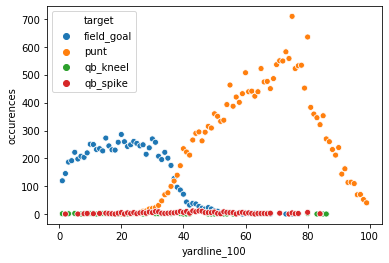

In [6]:
# show the best time for the each target / play

sns.scatterplot(x='yardline_100', y='occurences', hue='target', data=tar)

In [7]:
features = target_col.columns.values
#print(len(features))

y = target_col['target']
X = target_col[features[0:-8]]

In [8]:
from sklearn.model_selection import train_test_split 
  
# split into 80:20 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (25112, 94)
Number transactions y_train dataset:  (25112,)
Number transactions X_test dataset:  (6278, 94)
Number transactions y_test dataset:  (6278,)


# Decision Tree ( base model)

In [45]:
from operator import itemgetter
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [14]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [15]:
# Without random search with imbalanced model
from sklearn import metrics
measure_performance(X_train, y_train, dt_old, show_confussion_matrix=False)

Accuracy:0.990 

Classification report
              precision    recall  f1-score   support

  field_goal       0.99      0.99      0.99      7158
        punt       0.99      1.00      1.00     17636
    qb_kneel       0.71      0.59      0.65        51
    qb_spike       0.85      0.81      0.83       267

    accuracy                           0.99     25112
   macro avg       0.89      0.84      0.86     25112
weighted avg       0.99      0.99      0.99     25112
 



That means that the average accuracy (percentage of correct classifications using the trained model) is 95%. That accuracy is pretty high, we can see if better parameters can be found.

In [ ]:
print("-- 10-fold cross-validation ")
dt_old = DecisionTreeClassifier(min_samples_split=20,
                                random_state=99)
dt_old.fit(X, y)
scores = cross_val_score(dt_old, X, y, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

In [52]:
# Random Search

print("-- Random Parameter Search via 10-fold CV")

# dict of parameter list/distributions to sample
param_dist = {"criterion": ["gini", "entropy"],
              "min_samples_split": randint(1, 20),
              "max_depth": randint(1, 20),
              "min_samples_leaf": randint(1, 20),
              "max_leaf_nodes": randint(2, 20)
              }

# build a classifier
#dt = DecisionTreeClassifier()
#model1 = run_randomsearch(X, y, dt, param_dist, cv=10, n_iter_search=20)

-- Random Parameter Search via 10-fold CV


In [54]:
n_iter_search = 500
random_search = RandomizedSearchCV(dt_old,cv = 10,
                          n_iter=n_iter_search,
                          param_distributions=param_dist,
                          iid=False)
 
#在训练集上训练
#grid.fit(X_train,np.ravel(trainlabel.values))
random_search.fit(X_train, y_train)

#返回最优的训练器
best_estimator = random_search.best_estimator_
print(best_estimator)

DecisionTreeClassifier(max_depth=19, max_leaf_nodes=19, min_samples_leaf=4,
                       min_samples_split=18, random_state=99)


In [94]:

# print winning set of hyperparameters
from pprint import pprint
#pprint(model.best_estimator_.get_params())
pprint(random_search.best_estimator_.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': None,
 'max_leaf_nodes': 19,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 18,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 99,
 'splitter': 'best'}


In [97]:
# train the decision tree on the training data
from sklearn import tree   

dt_mod = tree.DecisionTreeClassifier(criterion= 'gini', max_depth=19, max_leaf_nodes=19, min_samples_leaf=4,
                                     max_features = None, splitter ='best',
                       min_samples_split=18, random_state=99)
dt_mod = dt.fit(X_train, y_train)

In [98]:
from sklearn import metrics
#measure_performance(X_train, y_train, dt_mod, show_confussion_matrix=False) 
measure_performance(X_test, y_test, dt_mod, show_confussion_matrix=False) 

Accuracy:0.974 

Classification report
              precision    recall  f1-score   support

  field_goal       0.96      0.95      0.95      1724
        punt       0.99      0.99      0.99      4483
    qb_kneel       0.71      0.36      0.48        14
    qb_spike       0.47      0.49      0.48        57

    accuracy                           0.97      6278
   macro avg       0.78      0.70      0.72      6278
weighted avg       0.97      0.97      0.97      6278
 



In [60]:
# visualize the tree


# Over-Sampling Model (SMOTE) & DecisionTree

In [65]:
# SMOTE Model

#X_smote_dt, y_smote_dt = SMOTE().fit_sample(X_train, y_train)

print("Before OverSampling, counts of label 'field goal': {}".format(sum(y_train == "field_goal"))) 
print("Before OverSampling, counts of label 'punt': {}".format(sum(y_train == "punt"))) 
print("Before OverSampling, counts of label 'qb_kneel': {}".format(sum(y_train == "qb_kneel"))) 
print("Before OverSampling, counts of label 'qb_spike': {} \n".format(sum(y_train == "qb_spike"))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy='auto', k_neighbors=10, random_state=20)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print("After OverSampling, counts of label 'field goal': {}".format(sum(y_train_res == "field_goal")))
print("After OverSampling, counts of label 'punt': {}".format(sum(y_train_res == "punt")))
print("After OverSampling, counts of label 'qb_kneel': {}".format(sum(y_train_res == "qb_kneel")))
print("After OverSampling, counts of label 'qb_spike': {}".format(sum(y_train_res == "qb_spike"))) 

Before OverSampling, counts of label 'field goal': 7158
Before OverSampling, counts of label 'punt': 17636
Before OverSampling, counts of label 'qb_kneel': 51
Before OverSampling, counts of label 'qb_spike': 267 

After OverSampling, counts of label 'field goal': 17636
After OverSampling, counts of label 'punt': 17636
After OverSampling, counts of label 'qb_kneel': 17636
After OverSampling, counts of label 'qb_spike': 17636


In [99]:
from sklearn import metrics
measure_performance(X_train_res, y_train_res, dt_mod, show_confussion_matrix=False) 

Accuracy:0.753 

Classification report
              precision    recall  f1-score   support

  field_goal       0.56      0.99      0.72     17636
        punt       0.88      1.00      0.94     17636
    qb_kneel       0.99      0.54      0.69     17636
    qb_spike       0.87      0.48      0.62     17636

    accuracy                           0.75     70544
   macro avg       0.82      0.75      0.74     70544
weighted avg       0.82      0.75      0.74     70544
 



# Random Forest (Base Model)

In [88]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor

# create random forest classifier model
rf_model = RandomForestClassifier()

In [91]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               #'max_features': ['auto', 'sqrt'],
               "max_features": sp_randint(1, 20),
               'min_samples_leaf': randint(1, 20),
               'min_samples_split': randint(1, 20),
               #'n_estimators': [130, 180, 230]
                'n_estimators' : randint(1, 200)}

In [111]:
n_iter_search = 100
random_search_rf = RandomizedSearchCV(rf_model,cv = 10,
                          n_iter=n_iter_search,
                          param_distributions=random_grid,
                          iid=False,
                          random_state=2)
 
#在训练集上训练
#grid.fit(X_train,np.ravel(trainlabel.values))
random_search_rf.fit(X_train, y_train)

#返回最优的训练器
best_estimator = random_search_rf.best_estimator_
print(best_estimator)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features=15,
                       min_samples_split=6, n_estimators=88)


In [112]:

# print winning set of hyperparameters
from pprint import pprint
#pprint(model.best_estimator_.get_params())
pprint(random_search_rf.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 15,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 88,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [113]:
model_rf = RandomForestClassifier(
     bootstrap = False,
     ccp_alpha = 0.0,
     class_weight = None,
     criterion = 'gini',
     max_depth = 30,
     max_features = 15,
     max_leaf_nodes = None,
     max_samples = None,
     min_impurity_decrease = 0.0,
     min_impurity_split = None,
     min_samples_leaf = 1,
     min_samples_split = 6,
     min_weight_fraction_leaf = 0.0,
     n_estimators = 88,
     n_jobs = None,
     oob_score = False,
     random_state = None,
     verbose = 0,
     warm_start = False)

#Train the model using the training sets y_pred=clf.predict(X_test)
model_rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred=model_rf.predict(X_test)

In [116]:
measure_performance(X, y, model_rf, show_confussion_matrix=False)

Accuracy:0.996 

Classification report
              precision    recall  f1-score   support

  field_goal       0.99      1.00      0.99      8882
        punt       1.00      1.00      1.00     22119
    qb_kneel       0.95      0.82      0.88        65
    qb_spike       0.98      0.89      0.93       324

    accuracy                           1.00     31390
   macro avg       0.98      0.92      0.95     31390
weighted avg       1.00      1.00      1.00     31390
 



# Over-Sampling Model (SMOTE) & RandomForest

In [117]:
# SMOTE Model

print("Before OverSampling, counts of label 'field goal': {}".format(sum(y_train == "field_goal"))) 
print("Before OverSampling, counts of label 'punt': {}".format(sum(y_train == "punt"))) 
print("Before OverSampling, counts of label 'qb_kneel': {}".format(sum(y_train == "qb_kneel"))) 
print("Before OverSampling, counts of label 'qb_spike': {} \n".format(sum(y_train == "qb_spike"))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy='auto', k_neighbors=10, random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
X_smote_rf, y_smote_rf = sm.fit_sample(X,y)

print("After OverSampling, counts of label 'field goal': {}".format(sum(y_train_res == "field_goal")))
print("After OverSampling, counts of label 'punt': {}".format(sum(y_train_res == "punt")))
print("After OverSampling, counts of label 'qb_kneel': {}".format(sum(y_train_res == "qb_kneel")))
print("After OverSampling, counts of label 'qb_spike': {}".format(sum(y_train_res == "qb_spike"))) 

Before OverSampling, counts of label 'field goal': 7158
Before OverSampling, counts of label 'punt': 17636
Before OverSampling, counts of label 'qb_kneel': 51
Before OverSampling, counts of label 'qb_spike': 267 

After OverSampling, counts of label 'field goal': 17636
After OverSampling, counts of label 'punt': 17636
After OverSampling, counts of label 'qb_kneel': 17636
After OverSampling, counts of label 'qb_spike': 17636


In [119]:
# SMOTE Model

from sklearn import metrics
#measure_performance(X_smote_rf, y_smote_rf, model_rf, show_confussion_matrix=False)
measure_performance(X_train_res, y_train_res, model_rf, show_confussion_matrix=False)

Accuracy:0.692 

Classification report
              precision    recall  f1-score   support

  field_goal       0.51      1.00      0.68     17636
        punt       0.81      1.00      0.90     17636
    qb_kneel       1.00      0.31      0.47     17636
    qb_spike       0.91      0.46      0.61     17636

    accuracy                           0.69     70544
   macro avg       0.81      0.69      0.66     70544
weighted avg       0.81      0.69      0.66     70544
 



# Visualization ()
二分类问题中的ROC曲线

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dt_old.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

In [131]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(2)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
# Learn to predict each class against the other
svm = svm.SVC(kernel='linear', probability=True,random_state=random_state)

###通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
y_score = svm.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

多分类问题中的ROC曲线

In [ ]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
# 将标签二值化
y = label_binarize(y, classes=[0, 1, 2])
# 设置种类
n_classes = y.shape[1]

# 训练模型并预测
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()